
# Import the libararies 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize

# Importing the data

In [2]:
df=pd.read_csv("C:\\Users\\GOYAL\\Desktop\\covid19_tweets.csv")

# Data Exploration

In [3]:
df.head(5)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
columns=df.columns
columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
df.shape

(179108, 13)

In [6]:
df.isnull().sum()  #Check null values count in each Column

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [7]:
df.nunique() #Check Unique values count in each Column

user_name            92276
user_location        26920
user_description     89200
user_created         93708
user_followers       27694
user_friends         11022
user_favourites      35259
user_verified            2
date                136611
text                178683
hashtags             52640
source                 610
is_retweet               1
dtype: int64

In [8]:
def col_unique_values_count(data,column):
    value=data.loc[:,column].value_counts(dropna=False)
    perc=round(data.loc[:,column].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([value,perc],axis=1,keys=['Total','Percentage'])

In [9]:
col_unique_values_count(df,"user_location")

,Total,Percentage
NaN,36771,20.53
India,3741,2.09
United States,2455,1.37
"New Delhi, India",1721,0.96
"Mumbai, India",1401,0.78
...,...,...
Loading.......................,1,0.00
OPIC Ogun State Nigeria,1,0.00
"Kasauli, India",1,0.00
Wales. United Kingdom,1,0.00


In [10]:
col_unique_values_count(df,"hashtags")

,Total,Percentage
NaN,51334,28.66
['COVID19'],37792,21.10
['Covid19'],4834,2.70
['covid19'],3124,1.74
"['coronavirus', 'CoronaVirusUpdate', 'COVID19', 'CoronavirusPandemic']",624,0.35
...,...,...
"['faux', 'highfives']",1,0.00
"['DOH', 'COVID19']",1,0.00
"['Covid19', 'Pandemic', 'Liberal']",1,0.00
"['Breaking', 'Russia', 'COVID19', 'Putin']",1,0.00


# Exploratory data analysis

In [11]:
top_15_user = pd.DataFrame(df['user_name'].value_counts().sort_values(ascending=False)[:15]).reset_index()
top_15_user.columns = ['user_name','count']
top_15_user

,user_name,count
0,GlobalPandemic.NET,679
1,Coronavirus Updates,625
2,covidnews.ch,402
3,Open Letters,390
4,Blood Donors India,282
5,Hindustan Times,280
6,IAM Platform,266
7,Paperbirds_Coronavirus,259
8,IANS Tweets,244
9,ANI,233


In [12]:
top_15_source = pd.DataFrame(df['source'].value_counts().sort_values(ascending=False)[:15]).reset_index()
top_15_source.columns = ['source','count']
top_15_source

,source,count
0,Twitter Web App,56891
1,Twitter for Android,40179
2,Twitter for iPhone,35472
3,TweetDeck,8543
4,Hootsuite Inc.,7321
5,Twitter for iPad,4336
6,Buffer,2728
7,Sprout Social,1833
8,Instagram,1759
9,IFTTT,1545


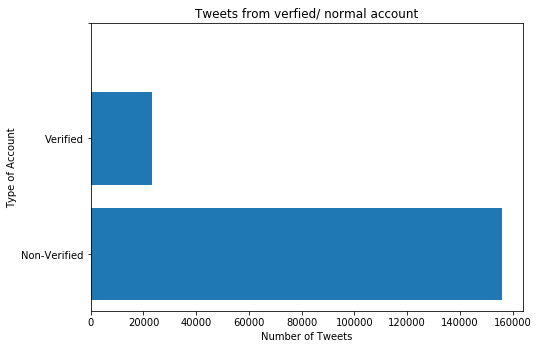

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# count the occurrence of each class 
data = df["user_verified"].value_counts() 
# get x and y data 
points = data.index
frequency = data.values
#plot graph
ax.barh(points,frequency)
ax.set_yticks([0,1,2])
ax.set_yticklabels(["Non-Verified","Verified"])
plt.xlabel("Number of Tweets")
plt.ylabel("Type of Account")
plt.title("Tweets from verfied/ normal account")
plt.show()

In [14]:
def WORDCLOUD(data, title = None):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='White',stopwords=stopwords,max_words=200,max_font_size=40,scale=3,random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

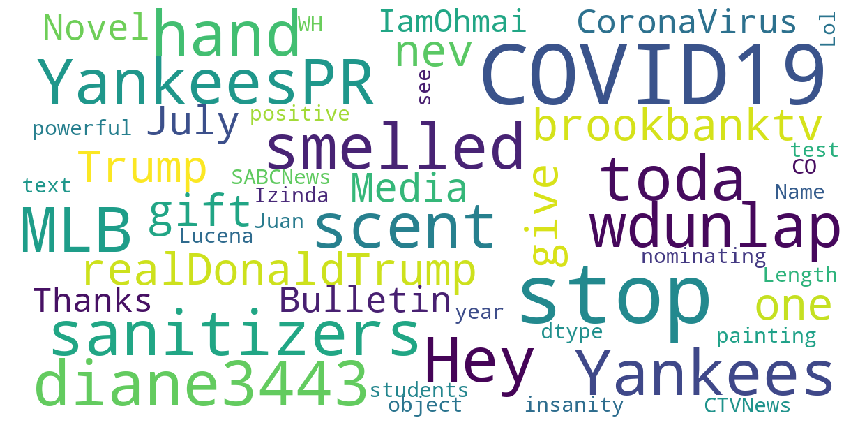

In [15]:
WORDCLOUD(df['text'])

# Data Pre-Processing

In [16]:
tweet_text = df['text']
tweet_text.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [17]:
#Removing URLs
def remove_URLs(str):
    ans = ""
    clean_tweet1 = re.match('(.*?)http.*?\s?(.*?)', str)
    clean_tweet2 = re.match('(.*?)https.*?\s?(.*?)', str)
    if clean_tweet1:
        ans=ans+clean_tweet1.group(1)
        ans=ans+clean_tweet1.group(2)
    elif clean_tweet2: 
        ans=ans+clean_tweet2.group(1)
        ans=ans+clean_tweet2.group(2)
    else:
        ans = str
    return ans


tweet_text = tweet_text.apply(lambda tweet: remove_URLs(tweet))
tweet_text.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [18]:
#Removing Emoticons
def remove_Emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
tweet_text  = tweet_text.apply(lambda tweet: remove_Emoji(tweet))
tweet_text.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [19]:
#Retaining only alphabets (removing all punctuations and numbers)
def remove_alphabet(inputString):
    return (re.sub('[^a-zA-Z]', ' ',inputString))
tweet_text  = tweet_text.apply(lambda tweet: remove_alphabet(tweet))
tweet_text.head()

0    If I smelled the scent of hand sanitizers toda...
1    Hey  Yankees  YankeesPR and  MLB   wouldn t it...
2     diane      wdunlap  realDonaldTrump Trump nev...
3     brookbanktv The one gift  COVID   has give me...
4       July   Media Bulletin on Novel  CoronaVirus...
Name: text, dtype: object

In [20]:
tweet_text = tweet_text.apply(lambda x: x.lower())
tweet_text.head()

0    if i smelled the scent of hand sanitizers toda...
1    hey  yankees  yankeespr and  mlb   wouldn t it...
2     diane      wdunlap  realdonaldtrump trump nev...
3     brookbanktv the one gift  covid   has give me...
4       july   media bulletin on novel  coronavirus...
Name: text, dtype: object

In [21]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])
tweet_text = tweet_text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
tweet_text.head()

0    smelled scent hand sanitizers today someone pa...
1    hey yankees yankeespr mlb made sense players p...
2    diane wdunlap realdonaldtrump trump never clai...
3    brookbanktv one gift covid give appreciation s...
4    july media bulletin novel coronavirusupdates c...
Name: text, dtype: object

# Sentiment Analysis

In [22]:
sentiment = SentimentIntensityAnalyzer()
sentiment_scores = tweet_text.apply(lambda x: sentiment.polarity_scores(x))
sent_scores = pd.DataFrame(list(sentiment_scores))
sent_scores.tail()

,neg,neu,pos,compound
179103,0.000,0.682,0.318,0.4939
179104,0.435,0.235,0.329,-0.2263
179105,0.250,0.556,0.194,-0.2023
179106,0.000,0.660,0.340,0.5574
179107,0.239,0.761,0.000,-0.5267


In [23]:
sent_scores['Sentiment_tag'] = sent_scores['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores.head()

,neg,neu,pos,compound,Sentiment_tag
0,0.000,0.738,0.262,0.4939,positive
1,0.131,0.654,0.215,0.2263,positive
2,0.000,0.832,0.168,0.2057,positive
3,0.000,0.563,0.437,0.7351,positive
4,0.000,0.850,0.150,0.3182,positive


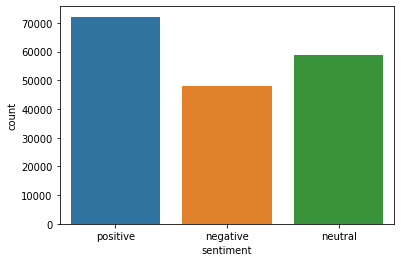

In [24]:
from collections import Counter
import seaborn as sns
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores['Sentiment_tag']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

In [25]:
sent_scores.shape

(179108, 5)

In [26]:
#df.reset_index()

In [27]:
result = pd.concat([df, sent_scores], axis=1)
result

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,neg,neu,pos,compound,Sentiment_tag
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,0.000,0.738,0.262,0.4939,positive
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,0.131,0.654,0.215,0.2263,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,0.000,0.832,0.168,0.2057,positive
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,0.000,0.563,0.437,0.7351,positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,0.000,0.850,0.150,0.3182,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False,0.000,0.682,0.318,0.4939,positive
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False,0.435,0.235,0.329,-0.2263,negative
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False,0.250,0.556,0.194,-0.2023,negative
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False,0.000,0.660,0.340,0.5574,positive


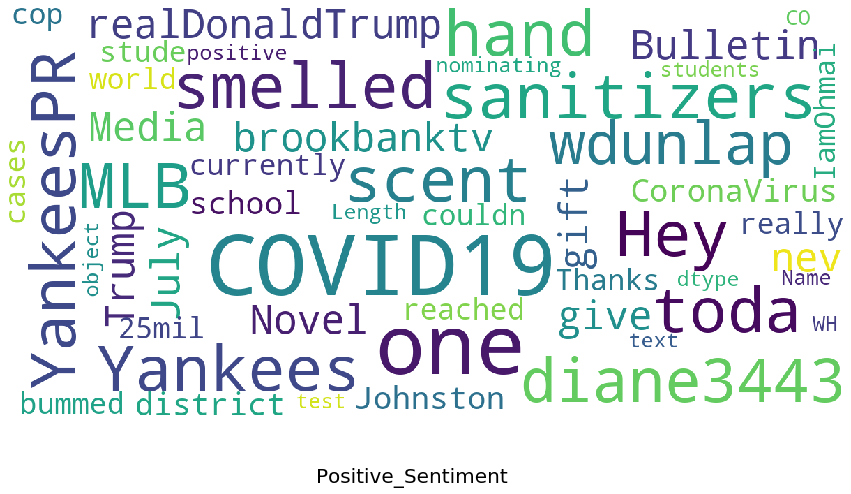

In [28]:
WORDCLOUD(result[result['Sentiment_tag'] == 'positive']['text'],'Positive_Sentiment')

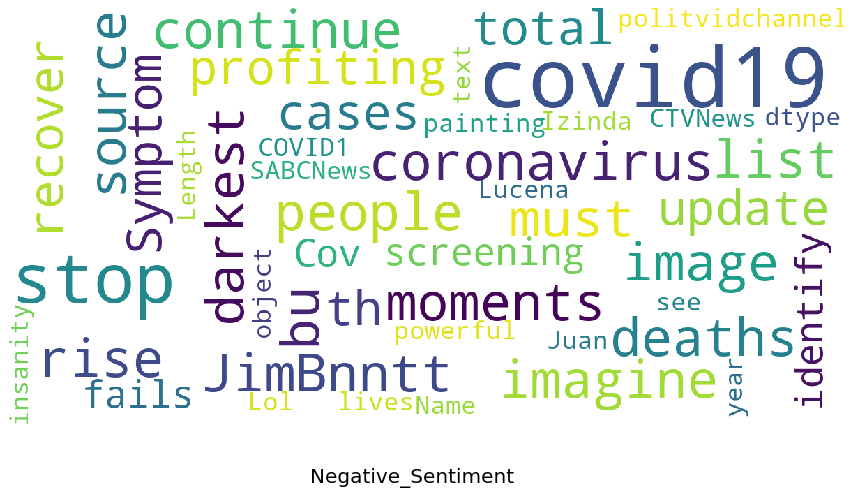

In [29]:
WORDCLOUD(result[result['Sentiment_tag'] == 'negative']['text'],'Negative_Sentiment')

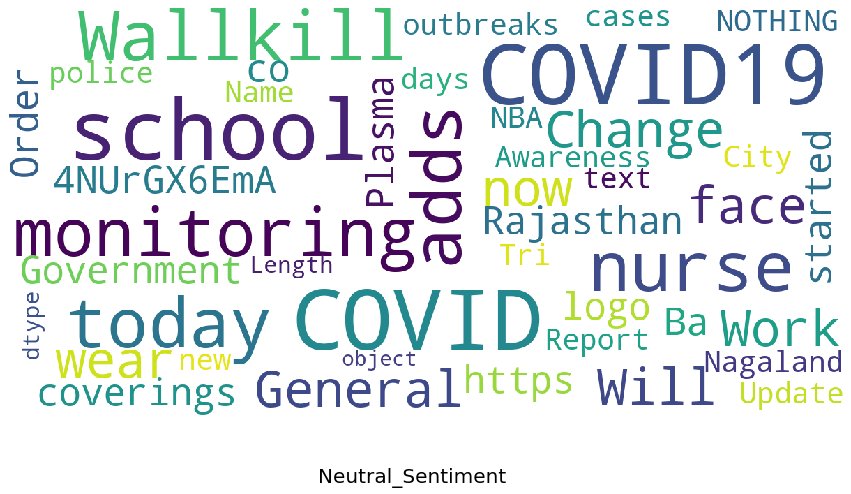

In [30]:
WORDCLOUD(result[result['Sentiment_tag'] == 'neutral']['text'],'Neutral_Sentiment')

In [31]:
result.to_csv("C:\\Users\\GOYAL\\Desktop\\covid19_tweets_sentiment.csv")